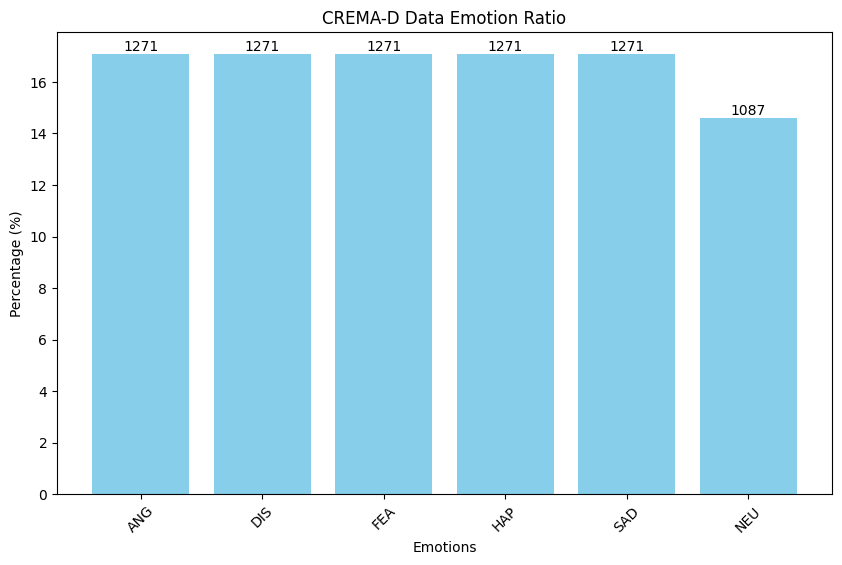

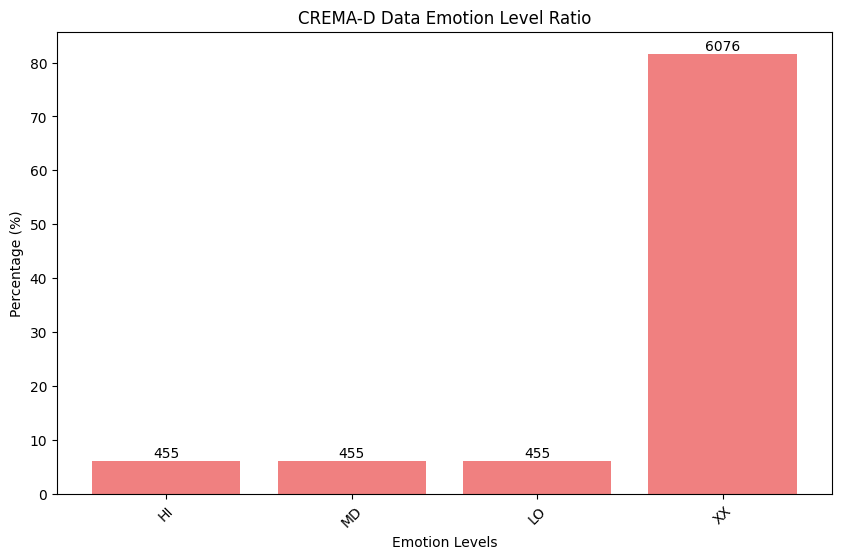

In [12]:
import os
import matplotlib.pyplot as plt

# 감정(emotion)과 레벨(level)을 위한 카운터 분리
emotion_counts = {
    'ANG': 0,
    'DIS': 0,
    'FEA': 0,
    'HAP': 0,
    'SAD': 0,
    'NEU': 0,
}

level_counts = {
    'HI': 0,
    'MD': 0,
    'LO': 0,
    'XX': 0,
}

total_emotions = 7442  # 감정 총 파일 수
total_levels = 7442  # 레벨 총 파일 수

# 파일을 읽어서 감정과 레벨을 카운트하는 함수
def read_train_file_list(root='/workspace/dataset/CREMA-D/OriginalData'):
    data_path = root
    file_paths = []

    # 데이터 경로가 있는지 확인
    if not os.path.exists(data_path):
        raise FileNotFoundError(f"Root directory '{data_path}' does not exist.")

    # 파일 목록을 가져옴
    for file in os.listdir(data_path):
        file_path = os.path.join(data_path, file)
        if os.path.isfile(file_path) and file.endswith('.wav'):
            file_paths.append(file_path)
    
    if len(file_paths) == 0:
        raise ValueError(f"No files found in directory '{data_path}'.")

    # 각 파일의 이름에서 감정과 레벨을 추출하고 카운트
    for file_path in file_paths:
        parts = file_path.split('_')
        if len(parts) > 3:  # 파일명 구조가 충분한지 확인
            emotion = parts[2]  # 세 번째 요소: 감정
            level = parts[3].split('.')[0]  # 네 번째 요소: 레벨 (확장자 제거)
            
            # 감정 카운트
            if emotion in emotion_counts:
                emotion_counts[emotion] += 1

            # 레벨 카운트
            if level in level_counts:
                level_counts[level] += 1

# 감정 및 레벨 데이터 카운트 실행
read_train_file_list()

# 감정 및 레벨에 대한 퍼센티지 계산
emotion_percentages = {emotion: (count / total_emotions) * 100 for emotion, count in emotion_counts.items()}
level_percentages = {level: (count / total_levels) * 100 for level, count in level_counts.items()}

# 감정에 대한 히스토그램 그리기
plt.figure(figsize=(10, 6))
emotion_bars = plt.bar(emotion_percentages.keys(), emotion_percentages.values(), color='skyblue')
plt.xlabel('Emotions')
plt.ylabel('Percentage (%)')
plt.title('CREMA-D Data Emotion Ratio')
plt.xticks(rotation=45)

# 각 막대 위에 감정별 파일 개수 표시
for bar, emotion in zip(emotion_bars, emotion_counts.values()):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{emotion}', ha='center', va='bottom')

plt.show()

# 레벨에 대한 히스토그램 그리기
plt.figure(figsize=(10, 6))
level_bars = plt.bar(level_percentages.keys(), level_percentages.values(), color='lightcoral')
plt.xlabel('Emotion Levels')
plt.ylabel('Percentage (%)')
plt.title('CREMA-D Data Emotion Level Ratio')
plt.xticks(rotation=45)

# 각 막대 위에 레벨별 파일 개수 표시
for bar, level in zip(level_bars, level_counts.values()):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{level}', ha='center', va='bottom')

plt.show()
